<h1>Reconhecimento de padrões em imagens</h1>

Bianca da Rocha Bartolomei - 2016001620

O projeto consiste na identificação da existência de plantas em imagens digitais de solo. 
As imagens de plantas usadas para treinar o classificador foram obtidas em https://www.plant-phenotyping.org/datasets-home. A composição das figuras dessa base de dados é uma planta em diferentes estágios de vida plantada na terra em um vazo preto.



In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


# Aquisição da imagem

As imagens usadas para o teste estão no formato png e jpg. Elas apresentam altura e largura variadas como pode ser visto nos resultados abaixo. Entretanto, todas são coloridas no formato RGB. 

No processo de de aquisição das imagens, foram usadas duas bibliotecas matplotlib(https://matplotlib.org/index.html) e skimage(https://scikit-image.org/docs/stable/). 

A função io.imread foi usada para carregar a imagem a partir de um arquivo, para isso foi passado como parâmetro o caminho dos arquivos utilizados. 

Para visualizar as imagens carregadas, foi usado as funções provindas da biblioteca matplotlib.pyplot.


Figura 1:
Dimensões da imagem: (500, 750, 3)
Altura: 500
Largura: 750
Valores de intensidade mínimo/máximo: 3 255
Valor no canal R: 77
Valor no canal G: 58
Valor no canal B: 44
---------------------------------------------------------
Figura 2:
Dimensões da imagem: (450, 800, 3)
Altura: 450
Largura: 800
Valores de intensidade mínimo/máximo: 0 255
Valor no canal R: 51
Valor no canal G: 51
Valor no canal B: 59
---------------------------------------------------------
Figura 3:
Dimensões da imagem: (800, 2000, 3)
Altura: 800
Largura: 2000
Valores de intensidade mínimo/máximo: 0 255
Valor no canal R: 48
Valor no canal G: 19
Valor no canal B: 5
---------------------------------------------------------
Figura 4:
Dimensões da imagem: (2048, 2448, 3)
Altura: 2048
Largura: 2448
Valores de intensidade mínimo/máximo: 0 255
Valor no canal R: 10
Valor no canal G: 13
Valor no canal B: 15
---------------------------------------------------------


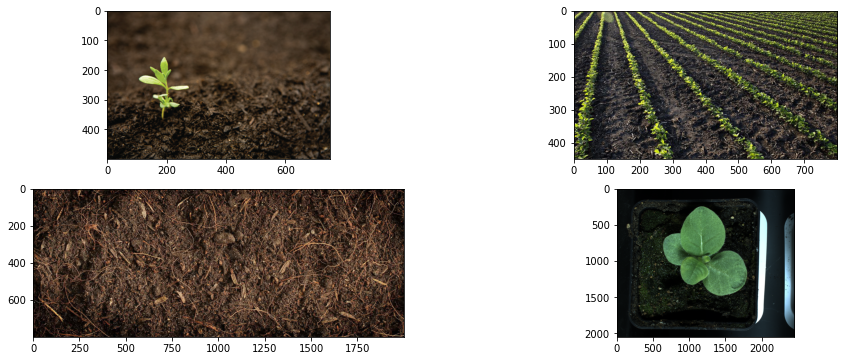

In [ ]:
import matplotlib.pyplot as plt
from skimage import io

plant1 = io.imread('/content/drive/My Drive/Academico/PDI/Dados/Teste/1490509jso0258.jpg')
plant2 = io.imread('/content/drive/My Drive/Academico/PDI/Dados/Teste/c4ae14e46ebe461c8f3b616b21bc9678_18.jpg')
plant3 = io.imread('/content/drive/My Drive/Academico/PDI/Dados/Teste/what-does-organic-matter-do-in-soil.jpg')
plant4 = io.imread('/content/drive/My Drive/Academico/PDI/Dados/Teste/tobacco_plant047_rgb.png')

print('Figura 1:')
print(f'Dimensões da imagem: {plant1.shape}')
print(f'Altura: {plant1.shape[0]}')
print(f'Largura: {plant1.shape[1]}')
print("Valores de intensidade mínimo/máximo:", plant1.min(), plant1.max())

print('Valor no canal R: {}'.format(plant1[ 100, 100, 0]))
print('Valor no canal G: {}'.format(plant1[ 100, 100, 1]))
print('Valor no canal B: {}'.format(plant1[ 100, 100, 2]))

print('---------------------------------------------------------')

print('Figura 2:')
print(f'Dimensões da imagem: {plant2.shape}')
print(f'Altura: {plant2.shape[0]}')
print(f'Largura: {plant2.shape[1]}')
print("Valores de intensidade mínimo/máximo:", plant2.min(), plant2.max())

print('Valor no canal R: {}'.format(plant2[ 100, 100, 0]))
print('Valor no canal G: {}'.format(plant2[ 100, 100, 1]))
print('Valor no canal B: {}'.format(plant2[ 100, 100, 2]))

print('---------------------------------------------------------')

print('Figura 3:')
print(f'Dimensões da imagem: {plant3.shape}')
print(f'Altura: {plant3.shape[0]}')
print(f'Largura: {plant3.shape[1]}')
print("Valores de intensidade mínimo/máximo:", plant3.min(), plant3.max())

print('Valor no canal R: {}'.format(plant3[ 100, 100, 0]))
print('Valor no canal G: {}'.format(plant3[ 100, 100, 1]))
print('Valor no canal B: {}'.format(plant3[ 100, 100, 2]))

print('---------------------------------------------------------')

print('Figura 4:')
print(f'Dimensões da imagem: {plant4.shape}')
print(f'Altura: {plant4.shape[0]}')
print(f'Largura: {plant4.shape[1]}')
print("Valores de intensidade mínimo/máximo:", plant4.min(), plant4.max())

print('Valor no canal R: {}'.format(plant4[ 100, 100, 0]))
print('Valor no canal G: {}'.format(plant4[ 100, 100, 1]))
print('Valor no canal B: {}'.format(plant4[ 100, 100, 2]))

print('---------------------------------------------------------')

fig, axes = plt.subplots(2,2, figsize=(16, 6))
axes[0, 0].imshow(plant1)
axes[0, 1].imshow(plant2)
axes[1, 0].imshow(plant3)
axes[1, 1].imshow(plant4)

plt.show()

#Pré-processamento

Primeiramente, optou-se por realizar a idetificação das plantas por meio da cor, fazendo com que não fosse necessário o pré-processamento das imagens. Essa identificação seria feita com a função slic da biblioteca skimage, que consiste em realizar agrupamentos de segmentos semelhantes usando para isso o K-médias. O problema dessa abordagem é que apesar de se estabelecer quantos agrupamentos serão obtidos, não é possível afirmar que a planta sempre vai ser o conjunto 2, por exemplo. Então, foi necessário mudar a abordagem. 

Assim, para essa nova abordagem, optou-se por utilizar o canal G das imagens, isso porque nesse canal a é cor verde, ficando melhor estabelecidas as fronteiras da planta com a terra. 

Nessa fase, foram utilizadas a biblioteca NumPy(https://numpy.org/) para poder manipular os canais da imagem e plotar os histogramas e a biblioteca skimage para a utilização do filtro de Roberts, implementado por ela. 

Foi escolhido o filtro de Roberts para estabelecer as fronteiras, uma vez que ele tem como característica valores de nível de intensidade altos para regiões com limites bem definidos e baixos para regiões suaves. 

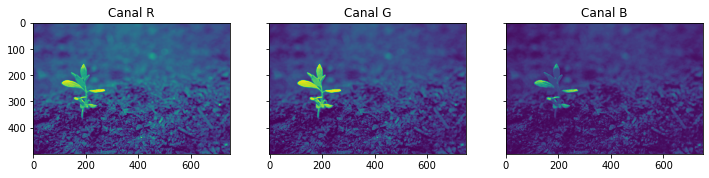

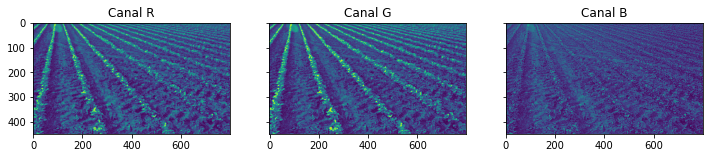

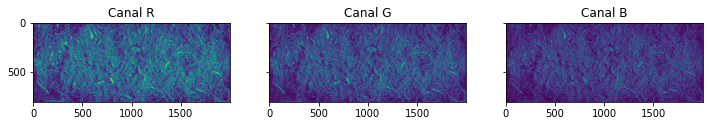

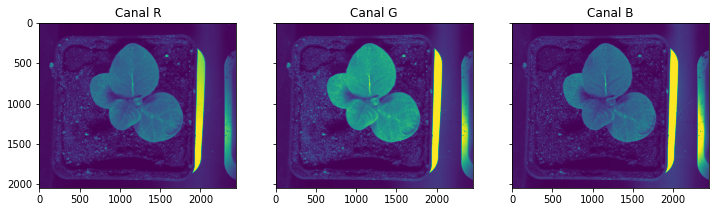

In [ ]:
import numpy as np

img10=plant1[:, :, 0]
img11=plant1[:, :, 1]
img12=plant1[:, :, 2]

fig, axes = plt.subplots(1, 3, figsize=(12, 12), sharex=True, sharey=True)
axes[0].set_title("Canal R")
axes[1].set_title("Canal G")
axes[2].set_title("Canal B")
axes[0].imshow(img10)
axes[1].imshow(img11)
axes[2].imshow(img12)


img20=plant2[:, :, 0]
img21=plant2[:, :, 1]
img22=plant2[:, :, 2]

fig, axes = plt.subplots(1, 3, figsize=(12, 12), sharex=True, sharey=True)
axes[0].set_title("Canal R")
axes[1].set_title("Canal G")
axes[2].set_title("Canal B")
axes[0].imshow(img20)
axes[1].imshow(img21)
axes[2].imshow(img22)



img30=plant3[:, :, 0]
img31=plant3[:, :, 1]
img32=plant3[:, :, 2]

fig, axes = plt.subplots(1, 3, figsize=(12, 12), sharex=True, sharey=True)
axes[0].set_title("Canal R")
axes[1].set_title("Canal G")
axes[2].set_title("Canal B")
axes[0].imshow(img30)
axes[1].imshow(img31)
axes[2].imshow(img32)


img40=plant4[:, :, 0]
img41=plant4[:, :, 1]
img42=plant4[:, :, 2]

fig, axes = plt.subplots(1, 3, figsize=(12, 12), sharex=True, sharey=True)
axes[0].set_title("Canal R")
axes[1].set_title("Canal G")
axes[2].set_title("Canal B")
axes[0].imshow(img40)
axes[1].imshow(img41)
axes[2].imshow(img42)


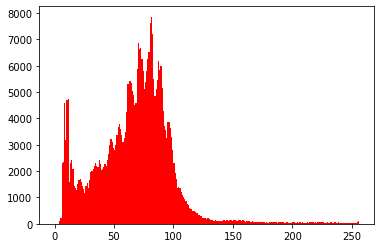

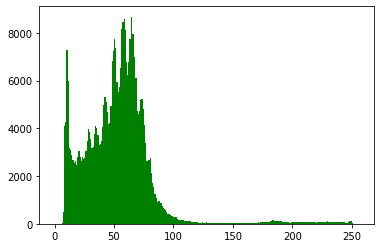

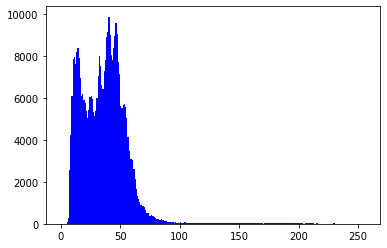

In [ ]:
hist,bins = np.histogram(plant1,256,[0,256])
plt.hist(img10.ravel(),256,[0,256], color = 'r')
plt.show()

hist,bins = np.histogram(plant1,256,[0,256])
plt.hist(img11.ravel(),256,[0,256], color = 'g')
plt.show()

hist,bins = np.histogram(plant1,256,[0,256])
plt.hist(img12.ravel(),256,[0,256], color = 'b')
plt.show()

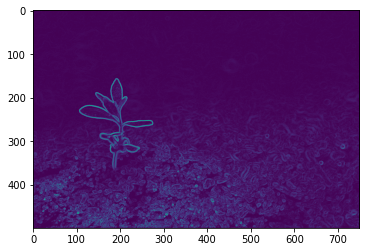

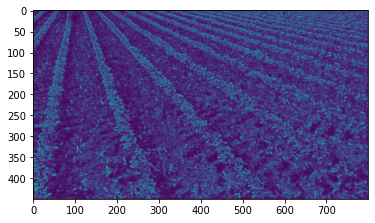

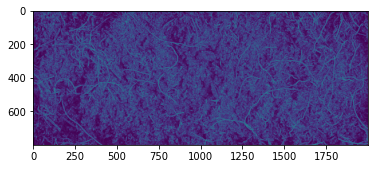

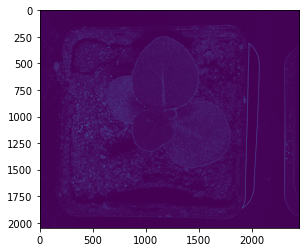

In [ ]:
from skimage.filters import roberts
filtered_image1 = roberts(img11)

plt.imshow(filtered_image1)
plt.show()


filtered_image2 = roberts(img21)

plt.imshow(filtered_image2)
plt.show()

filtered_image3 = roberts(img31)

plt.imshow(filtered_image3)
plt.show()

filtered_image4 = roberts(img41)

plt.imshow(filtered_image4)
plt.show()

#Segmentação

A segmentação usa a função watershed disponibilizada pela skimage. Essa função é a implementação do algoritmo da bacia hidrográfica. Nela, existem alguns marcadores definidos pelo usuário na imagem, o algoritmo então inunda as "bacias" dos marcadores até que sejam encontradas linhas de outro marcador.

Assim, o primeiro passo foi a definição dos marcadores. Para isso, usou-se como critério de marcação os níveis de intensidade. Percepeu-se pela análise das imagens que as folhas tinham níveis de intensidade entre 100 e 150. Portanto, marcou-se todos os pontos com nível menor que 150 com o valor 1 e depois todos os pontos menores que 100 com o valor 2. 

Depois passou para o algoritmo do watershed, a imagem filtrada com o filtro de roberts e os marcadores. O resultado dessa aplicação do algoritmo foi passado para a função binary_closing da biblioteca scipy. Essa função tenta encontrar fechamentos nas estruturas da imagem. Então, a ideia é buscar por folhas e marcá-las. 

O resultado dessa função é uma matriz com 0s e 1s, indicando onde estão esses fechamentos, em que em imagens com existência de plantas, espera-se que esses fechamentos sejam as plantas. Em imagens em que não existe planta, os fechamentos identificam particulas de terra.  


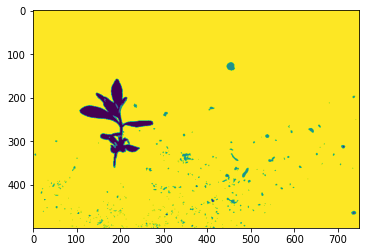

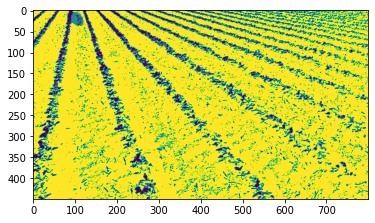

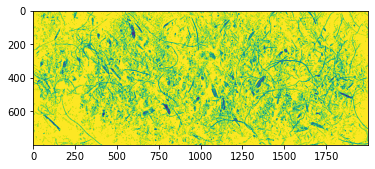

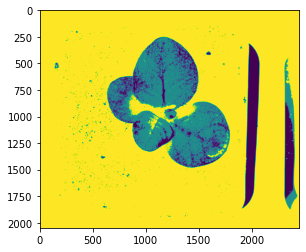

In [ ]:
marcadores11 = np.zeros_like(img11)
marcadores11[img11 < 150] = 1
marcadores11[img11 < 100] = 2

plt.imshow(marcadores11)
plt.show()


marcadores21 = np.zeros_like(img21)
marcadores21[img21 < 150] = 1
marcadores21[img21 < 100] = 2

plt.imshow(marcadores21)
plt.show()

marcadores31 = np.zeros_like(img31)
marcadores31[img31 < 150] = 1
marcadores31[img31 < 100] = 2

plt.imshow(marcadores31)
plt.show()

marcadores41 = np.zeros_like(img41)
marcadores41[img41 < 150] = 1
marcadores41[img41 < 100] = 2

plt.imshow(marcadores41)
plt.show()

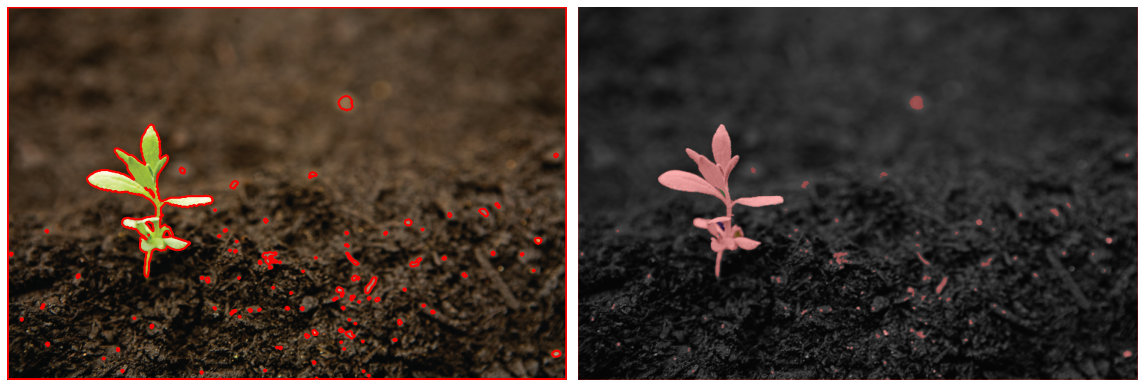

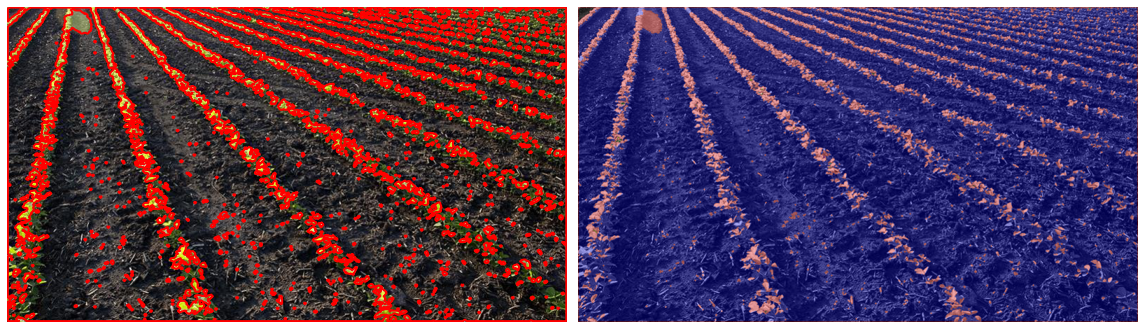

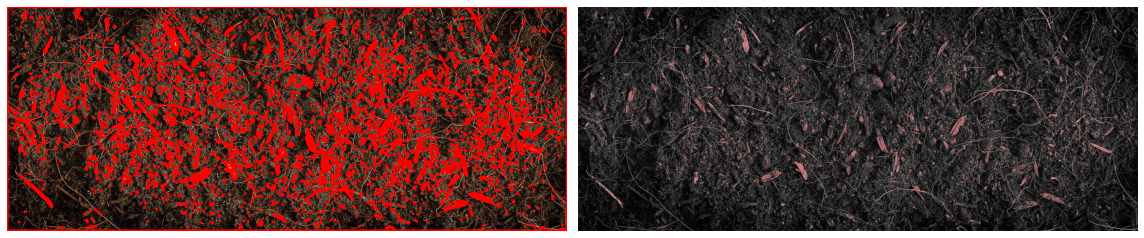

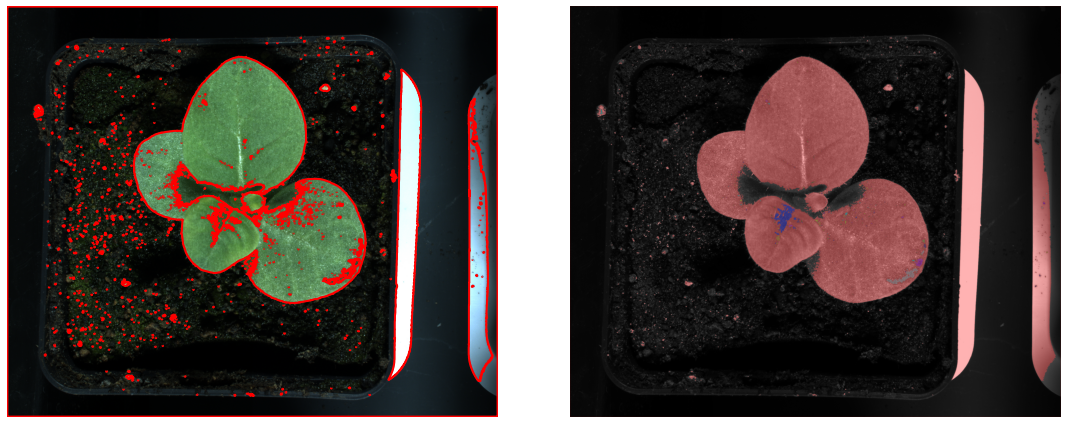

In [ ]:
from skimage import segmentation
from scipy import ndimage as ndi
from skimage.color import label2rgb

planta1_seg = segmentation.watershed(filtered_image1, marcadores11)
planta1_seg = ndi.binary_closing(planta1_seg-1)

planta_label1, _ = ndi.label(planta1_seg)
image_label_overlay1 = label2rgb(planta_label1, image=plant1, bg_label=1)

fig, axes = plt.subplots(1, 2, figsize=(16, 6), sharey=True)
axes[0].imshow(plant1, cmap=plt.cm.gray)
axes[0].contour(planta1_seg, [0.5], linewidths=2, colors='r')
axes[1].imshow(image_label_overlay1)

for a in axes:
    a.axis('off')

plt.tight_layout()


planta2_seg = segmentation.watershed(filtered_image2, marcadores21)
planta2_seg = ndi.binary_closing(planta2_seg-1)

planta_label2, _ = ndi.label(planta2_seg)
image_label_overlay2 = label2rgb(planta_label2, image=plant2, bg_label=1)

fig, axes = plt.subplots(1, 2, figsize=(16, 6), sharey=True)
axes[0].imshow(plant2, cmap=plt.cm.gray)
axes[0].contour(planta2_seg, [0.5], linewidths=2, colors='r')
axes[1].imshow(image_label_overlay2)

for a in axes:
    a.axis('off')

plt.tight_layout()

planta3_seg = segmentation.watershed(filtered_image3, marcadores31)
planta3_seg = ndi.binary_closing(planta3_seg-1)

planta_label3, _ = ndi.label(planta3_seg)
image_label_overlay3 = label2rgb(planta_label3, image=plant3, bg_label=1)

fig, axes = plt.subplots(1, 2, figsize=(16, 6), sharey=True)
axes[0].imshow(plant3, cmap=plt.cm.gray)
axes[0].contour(planta3_seg, [0.5], linewidths=2, colors='r')
axes[1].imshow(image_label_overlay3)

for a in axes:
    a.axis('off')

plt.tight_layout()


planta4_seg = segmentation.watershed(filtered_image4, marcadores41)
planta4_seg = ndi.binary_closing(planta4_seg-1)

planta_label4, _ = ndi.label(planta4_seg)
image_label_overlay4 = label2rgb(planta_label4, image=plant4, bg_label=1)

fig, axes = plt.subplots(1, 2, figsize=(16, 6), sharey=True)
axes[0].imshow(plant4, cmap=plt.cm.gray)
axes[0].contour(planta4_seg, [0.5], linewidths=2, colors='r')
axes[1].imshow(image_label_overlay4)

for a in axes:
    a.axis('off')

plt.tight_layout()

#Extração de características (Representação e descrição)

Escolheu-se usar como característica para representar a imagem e usar na classificação o próprio retorno da função de segmentação watershed. Ou seja, a representação foi feita com uma array de arrays composta de 1s e 0s, em que os 1s representam onde existe um objeto de interesse, podendo ser ou não uma planta.  


#Classificação (Reconhecimento e Interpretação)

Para fazer o sistema de classificação, considerou-se o seguinte cálculo: contou-se a quantidade de 0s e 1s da representação após a segmentação. Com esses valores armazenados, foi feita as razões entre eles (0 para 1 e 1 para 0). Observou-se que as imagens que não continham uma planta possuiam uma das razões bem mais alta do que as imagens que possuem plantas. Entretanto, essa razão de alto valor não era sempre para a mesma, em alguma imagens a razão 0/1 tinha o valor alto, em outras era a 1/0. Já as imagens com plantas possuem as duas razões mais baixas. Em função disso, optou-se por somar as duas razões. 

Foi feito o treinamento com as duas situações possíveis: a imagem possui planta ou não. Todas as somas das razões das imagens de treinamento foram somadas. Assim, ficaram dois valores: **a média das somas das razões de imagens com plantas e a das somas das razões de imagens sem plantas**. Esses valores foram subtraídos e arrendondados para baixo (**metrica de classificação = média das somas das razões de imagens sem plantas - média das somas das razõesde imagens com plantas**), obtendo-se assim a métrica de classificação.

Os testes foram realizados obtendo-se a soma das razões de cada uma das imagens testadas. Esses valores foram compardos com a métrica de classificação. Se for menor, então significa que existe uma planta na imagem, se for maior então não existe planta na imagem. 

Para essa etapa foram usadas as bibliotecas skimage, scipy e numpy já descritas anteriormentes porque os passos de processamento de imagem foram repetidos para o conjunto de treinamento do classificador. Além dessa, foi usada a biblioteca math para a função floor que arredonda um valor para baixo.



In [ ]:
import matplotlib.pyplot as plt
from skimage import io
import numpy as np
from skimage.filters import roberts
from skimage import segmentation
from scipy import ndimage as ndi
from skimage.color import label2rgb
from math import fabs, floor
import re
import os

unique, counts = np.unique(planta1_seg, return_counts=True)
value = (counts[0]/counts[1]) + (counts[1]/counts[0])
print("Soma das razões da figura 1: "+ str(value))

unique, counts = np.unique(planta2_seg, return_counts=True)
value2 = (counts[0]/counts[1]) + (counts[1]/counts[0])
print("Soma das razões da figura 2: "+ str(value2))

unique, counts = np.unique(planta3_seg, return_counts=True)
value3 = (counts[0]/counts[1]) + (counts[1]/counts[0])
print("Soma das razões da figura 3: "+ str(value3))

unique, counts = np.unique(planta4_seg, return_counts=True)
value4 = (counts[0]/counts[1]) + (counts[1]/counts[0])
print("Soma das razões da figura 4: "+ str(value4))


def get_data_from_image(path):
  image = io.imread(path)
  img1 = image[:, :, 1]

  filtered_image = roberts(img1)
  marcadores1 = np.zeros_like(img1)
  marcadores1[img1 < 150] = 1
  marcadores1[img1 < 100] = 2

  image_seg = segmentation.watershed(filtered_image, marcadores1)


  image_seg = ndi.binary_closing(image_seg-1)
  unique, counts = np.unique(image_seg, return_counts=True)
  return (counts[0]/counts[1]) + (counts[1]/counts[0])
  


def read_plant_folder(plant_folder_path, media_plant):
  all_files = os.listdir(plant_folder_path)
  media_plant = 0
  soma_p = 0
  for file_name in all_files:
    soma_p += get_data_from_image(plant_folder_path+'/'+file_name) 
  media_plant = soma_p/len(all_files)
  print("media planta: ")
  print(media_plant)
  return media_plant


def read_soil_folder(soil_folder_path, media_soil):
  all_files = os.listdir(soil_folder_path)
  media_soil = 0
  soma_s = 0
  for file_name in all_files:
    soma_s += get_data_from_image(soil_folder_path+'/'+file_name) 
  media_soil = soma_s/len(all_files)
  print("media solo: ")
  print(media_soil)
  return media_soil
   
soil_folder_path = '/content/drive/My Drive/Academico/PDI/Dados/Terra'
plant_folder_path = '/content/drive/My Drive/Academico/PDI/Dados/Planta'

import numpy as np

media_plant = 0
media_soil = 0
media_plant = read_plant_folder(plant_folder_path, media_plant)
media_soil = read_soil_folder(soil_folder_path, media_soil)


metric = floor(media_soil - media_plant)
print("Métrica: " + str(metric))


Soma das razões da figura 1: 29.39106172808002
Soma das razões da figura 2: 8.122121655297912
Soma das razões da figura 3: 21.463504898278746
Soma das razões da figura 4: 4.155735125429071
media planta: 
12.706188876611339
media solo: 
34.67866087227718
Métrica: 21


In [ ]:
def classifica(figura, v):
  if v < metric:
    print("Na "+ figura+ " existe uma planta na imagem")
  else:
    print("Na "+ figura+ " não existe planta na imagem")

# tem uma planta 
classifica("Figura 1", value)

# tem uma planta 
classifica("Figura 2", value2)

# não tem uma planta
classifica("Figura 3", value3)

# tem uma planta
classifica("Figura 4", value4)

Na Figura 1 não existe planta na imagem
Na Figura 2 existe uma planta na imagem
Na Figura 3 não existe planta na imagem
Na Figura 4 existe uma planta na imagem


#Análise dos resultados obtidos

O sistema de classificação foi testado com quatro imagens, a primeira imagem era uma planta qualquer sobre a terra, a segunda imagem era uma plantação, a terceira era terra sem a exitência de plantas vivas e a quarta imagem era uma planta de tabaco sobre a terra vista de cima. 

Todas as imagens foram avaliadas corretamente com exceção da primeira imagem, talvez o ângulo da imagem ou a luminosidade tenham afetado o resultado. 

Considerando o total de quatro testes em que houve a falha de um, então o sistema teve um taxa de acerto de 75%, o que pode ser considerado um bom valor.  Entretanto, são necessários mais testes para poder afirmar isso. 

#Conclusão




Esse trabalho teve como objetivo a identificação da existência de plantas em imagens do solo. Foi feito o processamento das imagens, passando por cada uma das etapas até chegar na classificação. Obteve-se um resultado satisfatório com a classificação, sendo 75%. 

A primeira conclusão a respeito das atividades foi que as técnicas usadas dependem muito do objetivo da aplicação. Por exemplo, usar o canal G da imagem só fez sentido porque o objeto a ser encontrado é uma planta. Além disso, a escolha das imagens de solo seguiram um padrão, o que abre margem para analisar solos com outro tipo de composição, como um solo arenoso.  

#Referências



M. Minervini, A. Fischbach, H.Scharr, and S.A. Tsaftaris. Finely-grained annotated datasets for image-based plant phenotyping. Pattern Recognition Letters, pages 1-10, 2015, doi:10.1016/j.patrec.2015.10.013 

Van der Walt, S., Sch"onberger, Johannes L, Nunez-Iglesias, J., Boulogne, Franccois, Warner, J. D., Yager, N., … Yu, T. (2014). scikit-image: image processing in Python. PeerJ, 2, e453.

Oliphant, T. E. (2006). A guide to NumPy (Vol. 1). Trelgol Publishing USA.
